In [36]:
import tensorflow as tf

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

# Load and preprocess the dataset
file_path = "/kaggle/input/wdbc-data/wdbc.data"
df = pd.read_csv(file_path, header=None)

# Drop the ID column as it is not a useful feature
df = df.drop(columns=[0])

# Encode the diagnosis column ('M' -> 1, 'B' -> 0)
le = LabelEncoder()
df[1] = le.fit_transform(df[1])

# Split into features (X) and target (y)
X = df.drop(columns=[1]).values  # Convert to NumPy array
y = df[1].values  # Convert to NumPy array

# Check dataset information
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Verify if the problem is binary classification
is_binary = len(np.unique(y)) == 2
print(f"\nIs Binary Classification: {is_binary}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       569 non-null    int64  
 1   2       569 non-null    float64
 2   3       569 non-null    float64
 3   4       569 non-null    float64
 4   5       569 non-null    float64
 5   6       569 non-null    float64
 6   7       569 non-null    float64
 7   8       569 non-null    float64
 8   9       569 non-null    float64
 9   10      569 non-null    float64
 10  11      569 non-null    float64
 11  12      569 non-null    float64
 12  13      569 non-null    float64
 13  14      569 non-null    float64
 14  15      569 non-null    float64
 15  16      569 non-null    float64
 16  17      569 non-null    float64
 17  18      569 non-null    float64
 18  19      569 non-null    float64
 19  20      569 non-null    float64
 20  21      569 non-null    float64
 21  22      569 non-null    f


Results for Logistic Regression:
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.9298		0.9753	0.9091
2	0.9298		0.9870	0.9048
3	0.9474		0.9857	0.9302
4	0.8947		0.9688	0.8571
5	0.8421		0.9468	0.8000
6	0.9649		0.9987	0.9545
7	0.9825		0.9987	0.9767


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

8	0.9825		1.0000	0.9778
9	0.9649		0.9974	0.9545
10	0.9649		0.9922	0.9545


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

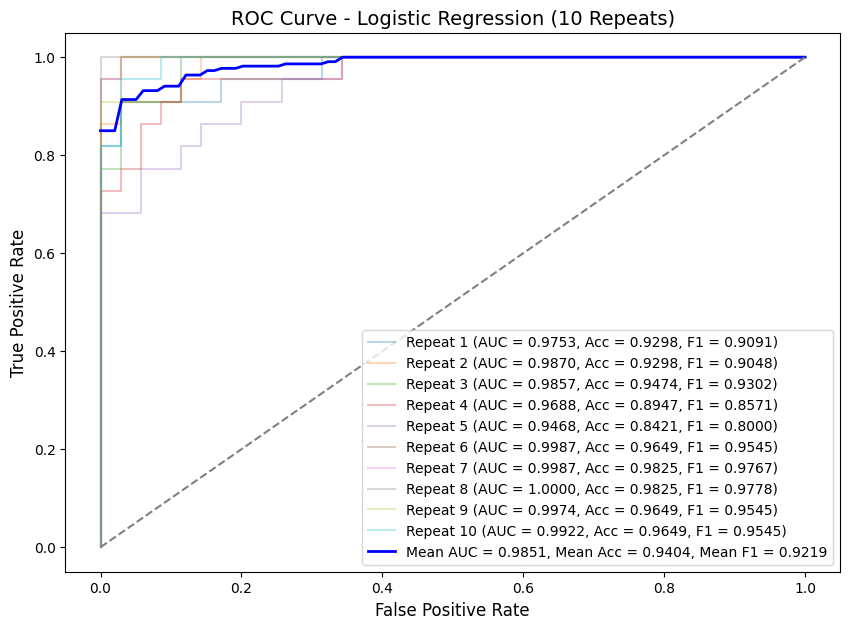


Results for Logistic Regression (L2):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.9298		0.9766	0.9091
2	0.9474		0.9883	0.9268
3	0.9649		0.9961	0.9524
4	0.9123		0.9779	0.8837
5	0.8596		0.9532	0.8261
6	0.9649		0.9987	0.9545
7	1.0000		1.0000	1.0000
8	0.9825		1.0000	0.9778
9	0.9649		0.9974	0.9545
10	0.9649		0.9948	0.9545


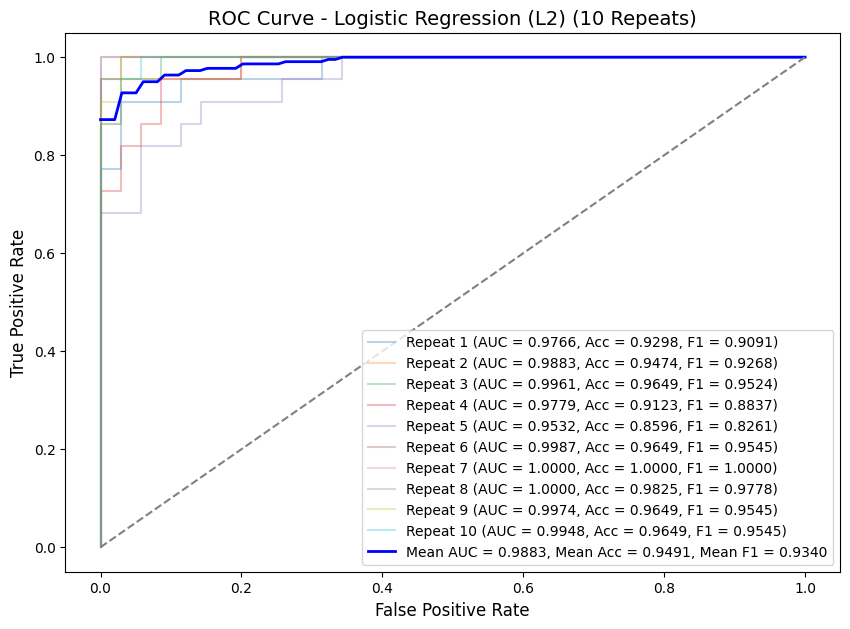


Results for Logistic Regression (L1):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.9123		0.9753	0.8837


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


2	0.9474		0.9701	0.9268
3	0.9649		0.9974	0.9524
4	0.9123		0.9779	0.8837


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


5	0.8947		0.9545	0.8696
6	0.9649		0.9974	0.9545
7	1.0000		1.0000	1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


8	0.9825		1.0000	0.9778


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


9	0.9649		0.9974	0.9545
10	0.9649		0.9974	0.9545


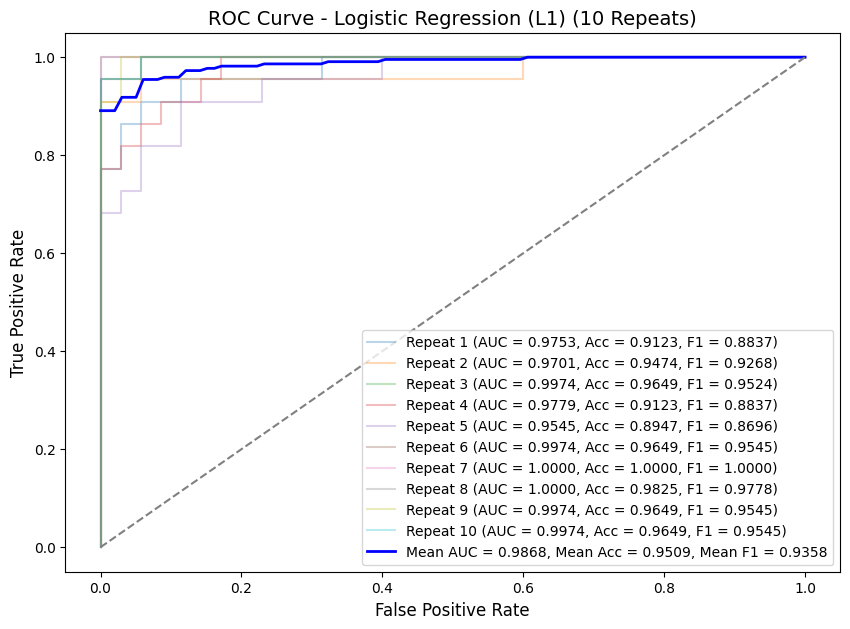


Results for 3-Layer NN:
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.8421		0.8805	0.7805
2	0.8947		0.8338	0.8500
3	0.8772		0.9740	0.8108
4	0.8246		0.9156	0.7500
5	0.7895		0.9013	0.7143
6	0.9474		0.9740	0.9302
7	0.9474		0.9935	0.9362
8	0.9298		0.9935	0.9130
9	0.9298		0.9662	0.9048
10	0.9123		0.9558	0.8780


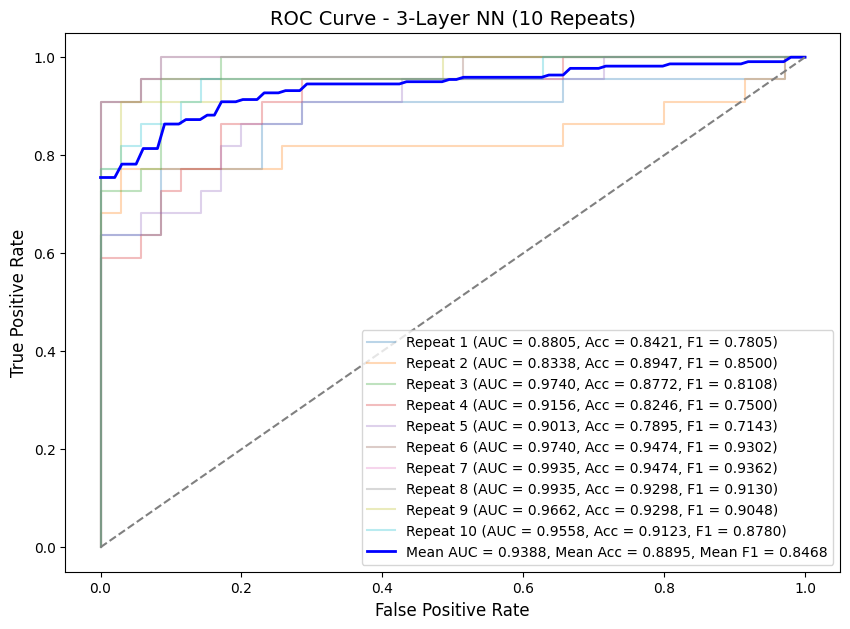


Results for 3-Layer NN (L2):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.8596		0.9481	0.8095
2	0.8947		0.9091	0.8500
3	0.8772		0.9727	0.8205
4	0.8070		0.8662	0.7179
5	0.8070		0.9013	0.7556
6	0.9298		0.9364	0.9091
7	0.9474		0.9987	0.9362
8	0.9298		0.9922	0.9130
9	0.9298		0.9870	0.9048
10	0.8947		0.9662	0.8571


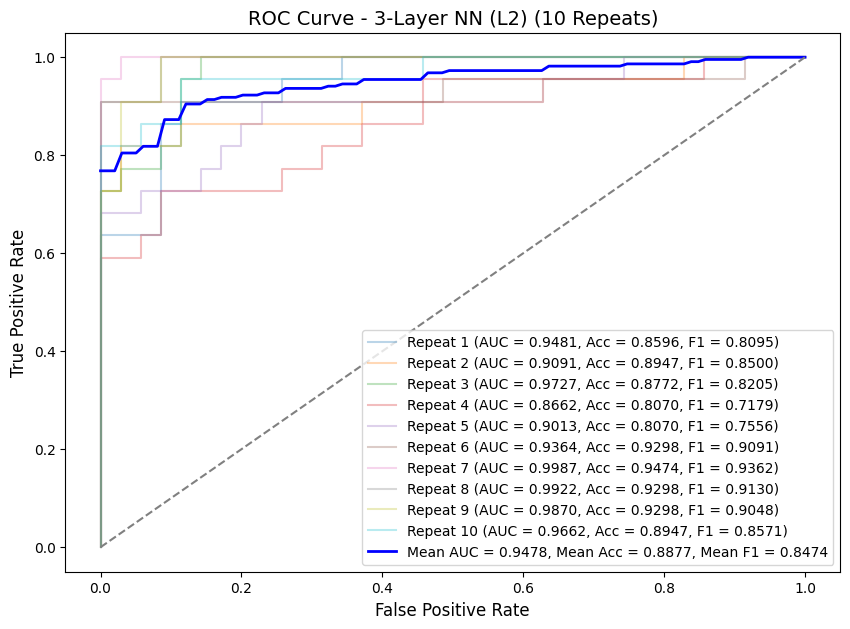


Results for 3-Layer NN (L1):
Repeat	Accuracy	AUC		F-Measure
--------------------------------------------------
1	0.8246		0.9429	0.7500
2	0.8947		0.9468	0.8500
3	0.8772		0.9662	0.8205
4	0.8246		0.8948	0.7500
5	0.8070		0.8909	0.7442
6	0.9298		0.9675	0.9091
7	0.9474		0.9948	0.9362
8	0.9474		0.9909	0.9333
9	0.9298		0.9779	0.9048
10	0.8947		0.9377	0.8500


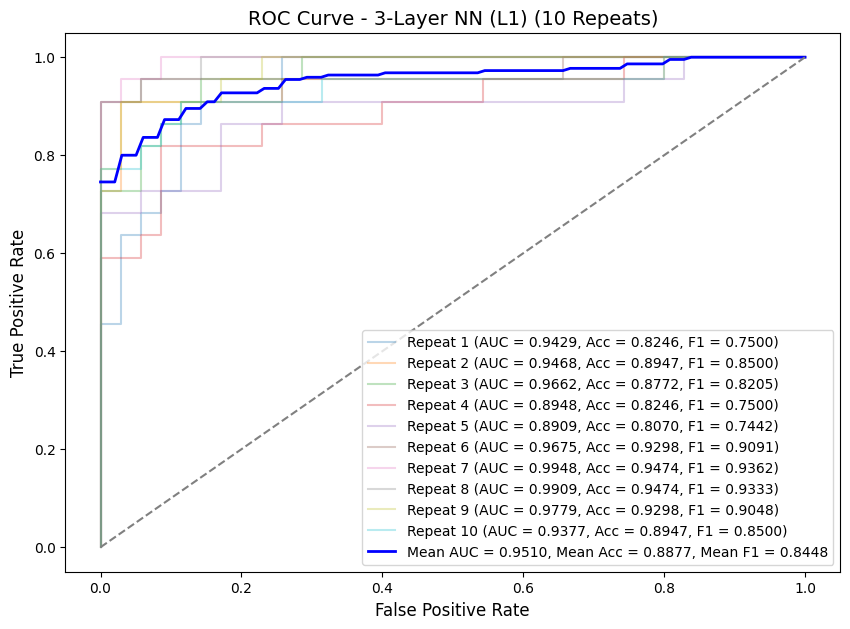

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score
import torch
import torch.nn as nn
import torch.optim as optim

# Function to train and evaluate a neural network
class ThreeLayerNN(nn.Module):
    def __init__(self, input_size):
        super(ThreeLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Function to compute ROC curve, accuracy, and F-measure for a model
def compute_metrics(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probability estimates
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = auc(fpr, tpr)
    
    return fpr, tpr, auc_score, acc, f1

# Function to train a neural network and compute ROC, accuracy, and F-measure
def train_nn_metrics(X_train, y_train, X_test, y_test):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Convert to tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

    # Model, Loss, Optimizer
    model = ThreeLayerNN(X_train.shape[1]).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    for epoch in range(100):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate
    with torch.no_grad():
        y_probs = model(X_test_tensor).cpu().numpy()
        preds = (y_probs > 0.5).astype(int)
        acc = accuracy_score(y_test, preds)
        f1 = f1_score(y_test, preds)
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc_score = auc(fpr, tpr)
    
    return fpr, tpr, auc_score, acc, f1

# Models dictionary
models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs'),
    "Logistic Regression (L2)": LogisticRegression(penalty='l2', solver='liblinear'),
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear'),
    "3-Layer NN": "nn",  # Placeholder for Neural Network
    "3-Layer NN (L2)": "nn",  # Placeholder for Neural Network with L2
    "3-Layer NN (L1)": "nn"  # Placeholder for Neural Network with L1
}

# Plot ROC curve for each model separately
for model_name, model in models.items():
    plt.figure(figsize=(10, 7))  # New full-size figure for each model
    
    mean_fpr = np.linspace(0, 1, 100)
    tprs, aucs, accs, f1s = [], [], [], []

    print(f"\nResults for {model_name}:")
    print("Repeat\tAccuracy\tAUC\t\tF-Measure")
    print("-" * 50)

    for repeat in range(10):  # 10 repeats
        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=repeat)
        train_index, test_index = next(skf.split(X, y))  # Get a new split
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        if model == "nn":
            fpr, tpr, auc_score, acc, f1 = train_nn_metrics(X_train, y_train, X_test, y_test)
        else:
            fpr, tpr, auc_score, acc, f1 = compute_metrics(model, X_train, y_train, X_test, y_test)

        tprs.append(np.interp(mean_fpr, fpr, tpr))
        aucs.append(auc_score)
        accs.append(acc)
        f1s.append(f1)

        print(f"{repeat+1}\t{acc:.4f}\t\t{auc_score:.4f}\t{f1:.4f}")
        plt.plot(fpr, tpr, alpha=0.3, label=f"Repeat {repeat+1} (AUC = {auc_score:.4f}, Acc = {acc:.4f}, F1 = {f1:.4f})")

    # Compute mean ROC curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = np.mean(aucs)
    mean_acc = np.mean(accs)
    mean_f1 = np.mean(f1s)

    plt.plot(mean_fpr, mean_tpr, color='blue', lw=2, label=f"Mean AUC = {mean_auc:.4f}, Mean Acc = {mean_acc:.4f}, Mean F1 = {mean_f1:.4f}")

    # Plot random baseline (AUC = 0.5)
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

    # Set titles and labels
    plt.title(f"ROC Curve - {model_name} (10 Repeats)", fontsize=14)
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.legend(loc="lower right", fontsize=10)

    # Show each plot separately
    plt.show()

In [1]:
from scipy.stats import ttest_rel
import itertools
import pandas as pd

# Accuracy values from 10-fold CV for each model
logistic_reg = [0.9298, 0.9298, 0.9474, 0.8947, 0.8421, 0.9649, 0.9825, 0.9825, 0.9649, 0.9649]
logistic_reg_l2 = [0.9298, 0.9474, 0.9649, 0.9123, 0.8596, 0.9649, 1.0000, 0.9825, 0.9649, 0.9649]
logistic_reg_l1 = [0.9123, 0.9474, 0.9649, 0.9123, 0.8947, 0.9649, 1.0000, 0.9825, 0.9649, 0.9649]
nn = [0.8421, 0.8947, 0.8772, 0.8246, 0.7895, 0.9474, 0.9474, 0.9298, 0.9298, 0.9123]
nn_l2 = [0.8596, 0.8947, 0.8772, 0.8070, 0.8070, 0.9298, 0.9474, 0.9298, 0.9298, 0.8947]
nn_l1 = [0.8246, 0.8947, 0.8772, 0.8246, 0.8070, 0.9298, 0.9474, 0.9474, 0.9298, 0.8947]

# Store model names and accuracy lists
model_names = [
    "Logistic Regression", 
    "Logistic Regression (L2)", 
    "Logistic Regression (L1)", 
    "3-Layer NN", 
    "3-Layer NN (L2)", 
    "3-Layer NN (L1)"
]
model_accuracies = [logistic_reg, logistic_reg_l2, logistic_reg_l1, nn, nn_l2, nn_l1]

# Perform paired t-tests and store results
alpha = 0.05  # Significance level
results = []

for (i, j) in itertools.combinations(range(len(model_names)), 2):
    stat, p = ttest_rel(model_accuracies[i], model_accuracies[j])
    significant = "Yes" if p < alpha else "No"
    results.append([model_names[i], model_names[j], stat, p, significant])

# Convert to DataFrame for better readability
results_df = pd.DataFrame(results, columns=["Model 1", "Model 2", "t-statistic", "p-value", "Significant Difference?"])

# Print results
print(results_df.to_string(index=False))


                 Model 1                  Model 2  t-statistic  p-value Significant Difference?
     Logistic Regression Logistic Regression (L2)    -2.999977 0.014957                     Yes
     Logistic Regression Logistic Regression (L1)    -1.766978 0.111034                      No
     Logistic Regression               3-Layer NN     7.660375 0.000031                     Yes
     Logistic Regression          3-Layer NN (L2)     8.219737 0.000018                     Yes
     Logistic Regression          3-Layer NN (L1)     6.714153 0.000087                     Yes
Logistic Regression (L2) Logistic Regression (L1)    -0.430067 0.677261                      No
Logistic Regression (L2)               3-Layer NN     7.965824 0.000023                     Yes
Logistic Regression (L2)          3-Layer NN (L2)     8.721624 0.000011                     Yes
Logistic Regression (L2)          3-Layer NN (L1)     7.725529 0.000029                     Yes
Logistic Regression (L1)               3

The paired t-test was the best choice for this analysis because it properly accounts for paired observations, and provides statistically powerful and easily interpretable results. The findings suggest that Logistic Regression (L2) and Logistic Regression (L1) significantly outperform neural networks, confirming their robustness in this setting.

**Based on the paired t-test results, Logistic Regression (L2) and Logistic Regression (L1) emerged as the best-performing models, significantly outperforming all three neural network models (p < 0.05). There was no significant difference between L2 and L1 regularization, indicating their consistent performance. Standard logistic regression also performed significantly better than all neural network models except for Logistic Regression (L1). The neural networks, including L2 and L1 regularization, did not show statistically superior performance over logistic regression models, suggesting that regularization techniques in neural networks did not substantially improve accuracy.**